In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import time
import datetime
import calendar
import matplotlib as mpl
import gmaps

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)




In [2]:
uber_data_4 = pd.read_csv('../uber/data_files/uber-raw-data-apr14.csv')
#uber_data_4
uber_data_5 = pd.read_csv('../uber/data_files/uber-raw-data-may14.csv')
#uber_data_5
uber_data_6 = pd.read_csv('../uber/data_files/uber-raw-data-jun14.csv')
#uber_data_6
uber_data_7= pd.read_csv('../uber/data_files/uber-raw-data-jul14.csv')
#uber_data_7
uber_data_8 = pd.read_csv('../uber/data_files/uber-raw-data-aug14.csv')
#uber_data_8
uber_data_9 = pd.read_csv('../uber/data_files/uber-raw-data-sep14.csv')
#uber_data_9
amer_data = pd.read_csv('../uber/data_files/other-American_B01362.csv')
#amer_data
dial_data = pd.read_csv('../uber/data_files/other-Dial7_B00887.csv')
#dial_data
lyft_data = pd.read_csv('../uber/data_files/other-Lyft_B02510.csv')
#lyft_data
skyline_data = pd.read_csv('../uber/data_files/other-Skyline_B00111.csv')
#skyline_data
fed_data = pd.read_csv('../uber/data_files/other-Federal_02216.csv')
fed_data

dial_data.rename(columns={'Date': 'Date/Time'}, inplace=True)
lyft_data.rename(columns={'time_of_trip': 'Date/Time'}, inplace=True)
skyline_data.rename(columns={'Date': 'Date/Time'}, inplace=True)
amer_data.rename(columns={'DATE': 'Date/Time'}, inplace=True)
fed_data.rename(columns={'Date': 'Date/Time'}, inplace=True)


In [3]:
uber_all_data = pd.DataFrame()
uber_all_data = uber_all_data.append(uber_data_4)
uber_all_data = uber_all_data.append(uber_data_5)
uber_all_data = uber_all_data.append(uber_data_6)
uber_all_data = uber_all_data.append(uber_data_7)
uber_all_data = uber_all_data.append(uber_data_8)
uber_all_data = uber_all_data.append(uber_data_9)

uber_all_data

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [4]:
uber_data_4_1 = pd.DataFrame(pd.to_datetime(uber_data_4['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
uber_data_5_1 = pd.DataFrame(pd.to_datetime(uber_data_5['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
uber_data_6_1 = pd.DataFrame(pd.to_datetime(uber_data_6['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
uber_data_7_1 = pd.DataFrame(pd.to_datetime(uber_data_7['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
uber_data_8_1 = pd.DataFrame(pd.to_datetime(uber_data_8['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
uber_data_9_1 = pd.DataFrame(pd.to_datetime(uber_data_9['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)

dial_data_1 = pd.DataFrame(pd.to_datetime(dial_data['Date/Time'],format = '%Y/%m/%d').dt.date)
lyft_data_1 = pd.DataFrame(pd.to_datetime(lyft_data['Date/Time'],format = '%m/%d/%Y %H:%M').dt.date)
skyline_data_1 = pd.DataFrame(pd.to_datetime(skyline_data['Date/Time'],format = '%m/%d/%Y').dt.date)
amer_data_1 = pd.DataFrame(pd.to_datetime(amer_data['Date/Time'],format = '%m/%d/%Y').dt.date)                        
fed_data_1 = pd.DataFrame(pd.to_datetime(fed_data['Date/Time'],format = '%m/%d/%Y').dt.date)

fed_data_1




,Date/Time
0,2014-07-01
1,2014-07-01
2,2014-07-01
3,2014-07-01
4,2014-07-01
...,...
271,2014-09-25
272,2014-09-26
273,2014-09-27
274,2014-09-27


In [5]:
uber_data_4_1['service'] = 'uber'
uber_data_5_1['service'] = 'uber'
uber_data_6_1['service'] = 'uber'
uber_data_7_1['service'] = 'uber'
uber_data_8_1['service'] = 'uber'
uber_data_9_1['service'] = 'uber'
dial_data_1['service'] = 'Dial'
lyft_data_1['service'] = 'Lyft'
skyline_data_1['service'] = 'Skyline'
amer_data_1['service'] = 'American'
fed_data_1['service'] = 'Federal'

all_data_1 = pd.DataFrame()
all_data_1 = all_data_1.append(uber_data_4_1)
all_data_1 = all_data_1.append(uber_data_5_1)
all_data_1 = all_data_1.append(uber_data_6_1)
all_data_1 = all_data_1.append(uber_data_7_1)
all_data_1 = all_data_1.append(uber_data_8_1)
all_data_1 = all_data_1.append(uber_data_9_1)
all_data_1 = all_data_1.append(dial_data_1)
all_data_1 = all_data_1.append(lyft_data_1)
all_data_1 = all_data_1.append(skyline_data_1)
all_data_1 = all_data_1.append(amer_data_1)
all_data_1 = all_data_1.append(fed_data_1)

all_data_1.sort_values('Date/Time', inplace = True, ascending = True)

all_data_1['Date/Time'] = pd.to_datetime(all_data_1['Date/Time'])
all_data_1['month'] = all_data_1['Date/Time'].dt.month
all_data_1

,Date/Time,service,month
0,2014-04-01,uber,4
328536,2014-04-01,uber,4
328537,2014-04-01,uber,4
328538,2014-04-01,uber,4
328539,2014-04-01,uber,4
...,...,...,...
56231,2014-09-30,Dial,9
646443,2014-09-30,uber,9
646442,2014-09-30,uber,9
646448,2014-09-30,uber,9


<module 'matplotlib.pyplot' from 'C:\\Users\\INTEL\\anaconda3\\envs\\PythonData\\lib\\site-packages\\matplotlib\\pyplot.py'>

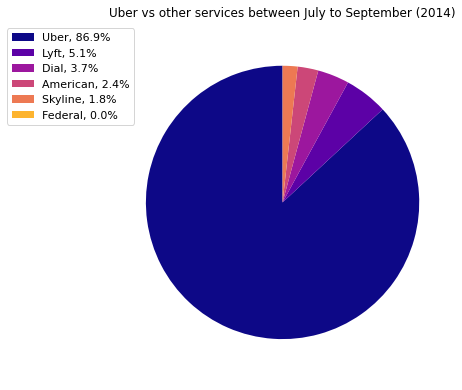

In [6]:
sizes = pd.value_counts(all_data_1["service"])
labels = 'Uber', 'Lyft', 'Dial', 'American', 'Skyline', 'Federal'

fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('plasma')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
    l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title ("Uber vs other services between July to September (2014)")

plt


In [7]:
for df in uber_all_data:

#Converting columns alphabets to lowercase
    uber_all_data.columns = [i.lower() for i in uber_all_data.columns]
    
#Converting Date/Time column to a datastamp
    uber_all_data['date/time'] = pd.to_datetime(uber_all_data['date/time'], format="%m/%d/%Y %H:%M:%S")

#Create a new column for day name
    uber_all_data['day_of_week'] = uber_all_data['date/time'].dt.day_name()

#Create a new column for day
    uber_all_data['day'] = uber_all_data['date/time'].dt.day

#Create a new column for month
    uber_all_data['month'] = uber_all_data['date/time'].dt.month

#Create a new column for hour
    uber_all_data['hour'] = uber_all_data['date/time'].dt.hour

#Create a new column for minute
    uber_all_data['minute'] = uber_all_data['date/time'].dt.minute
uber_all_data.head()

,date/time,lat,lon,base,day_of_week,day,month,hour,minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,4,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,4,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,4,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,4,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,4,0,33


In [8]:
df = uber_all_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date/time    datetime64[ns]
 1   lat          float64       
 2   lon          float64       
 3   base         object        
 4   day_of_week  object        
 5   day          int64         
 6   month        int64         
 7   hour         int64         
 8   minute       int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 345.9+ MB


In [9]:
df['month'].unique()
month_list = {
    4: 'April',
    5: 'May',
    6: 'June', 
    7: 'July',
    8: 'August',
    9: 'September'
}

df['month'] = df['month'].replace(month_list)
df.head()

,date/time,lat,lon,base,day_of_week,day,month,hour,minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,April,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,April,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,April,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,April,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,April,0,33


In [10]:
df['day_of_week'].unique()
weekday_list = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday',
    6: 'Sunday'
}

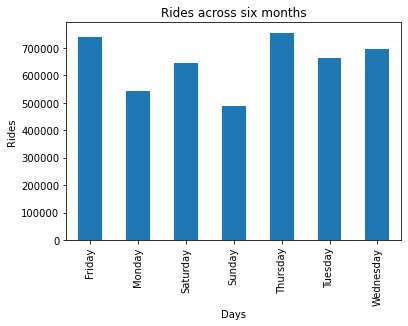

In [11]:
#Rides per week (Days of the week per month)

rides_per_week = df.groupby(["day_of_week"]).count()['date/time']

rides_per_week.plot.bar()
plt.title ("Rides across six months")
plt.xlabel("Days")
plt.ylabel("Rides")

plt.show()



Text(0.5, 1.0, 'Uber Pickups by Month and Weekday')

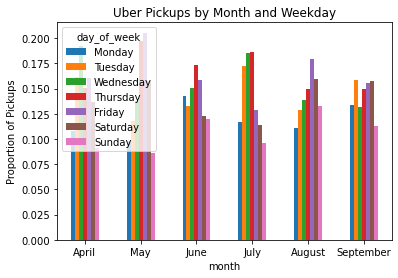

In [12]:
monthly_dow = df.groupby('month')['day_of_week'].value_counts().unstack()
monthly_dow_norm = monthly_dow.apply(lambda x: x/x.sum(), axis=1)

monthly_dow_norm.loc[month_list.values(),weekday_list.values()].plot(kind='bar', rot=0)

plt.ylabel('Proportion of Pickups')
plt.title('Uber Pickups by Month and Weekday')



In [13]:
locations = df[["lat", "lon"]].astype(float)
locations

,lat,lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722
...,...,...
1028131,40.7668,-73.9845
1028132,40.6911,-74.1773
1028133,40.8519,-73.9319
1028134,40.7081,-74.0066


In [14]:
# figure_layout = {
#     'width': '400px',
#     'height': '300px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }
# fig = gmaps.figure(layout=figure_layout)

# # # Assign the marker layer to a variable
# markers = gmaps.marker_layer(locations)
# # # Add the layer to the map
# fig.add_layer(markers)
# fig